![rf1](./img/rf1.webp) 

![rf2](./img/rf2.webp)

[figure: Random forest classification algorithm](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

### Dataset

The dataset used in this notebook is available [here](https://www.kaggle.com/datasets/tekbahadurkshetri/water-bodies-in-satellite-imagery).

In [28]:
ds = rio.open(r'data/X_train.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)

nrow_train = arr.shape[0]
ncol_train = arr.shape[1]

X_train = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
X_train.shape

6969162 4


(6969162, 4)

In [29]:
ds = rio.open(r'data/y_train.tif')
arr=ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(arr == np.nan, 0, arr)
y_train = arr.reshape(-1)
y_train.shape

(6969162,)

In [53]:
ds = rio.open(r'data/X_test.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)

nrow_test = arr[0]
ncol_test = arr[1]

X_test = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
X_test.shape

(4207593, 4)

In [56]:
ds = rio.open(r'data/y_test.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)
y_test = arr.reshape(-1)
y_test.shape

(4207593,)

In [30]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, verbose=3, n_jobs=-1)

In [31]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100building tree 27 of 100

building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100building tree 34 of 100

building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100building tree 40 of 100

building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:  7.0min remaining:   22.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.1min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=3)

In [57]:
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    9.8s remaining:    0.4s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    9.9s finished


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94   3682263
           1       0.82      0.06      0.12    525330

    accuracy                           0.88   4207593
   macro avg       0.85      0.53      0.53   4207593
weighted avg       0.87      0.88      0.83   4207593



In [59]:
y_pred_reshaped = y_pred.reshape(nrow_test, ncol_test)
y_test_reshaped = y_test.reshape(nrow_test, ncol_test)
X_test_reshaped = X_test.reshape(nrow_test, ncol_test, 4)
print(y_pred_reshaped.shape, X_test_reshaped.shape)

(1677, 2509) (1677, 2509, 4)


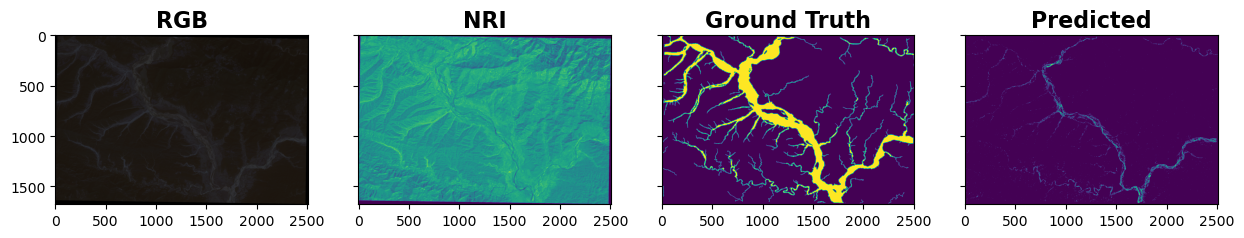

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,8))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.set_title("RGB", fontweight='bold', fontsize='16')
ax1.imshow(X_test_reshaped[:,:,:3])

ax2.set_title("NRI", fontweight='bold', fontsize='16')
ax2.imshow(X_test_reshaped[:,:,3])

ax3.set_title("Ground Truth", fontweight='bold', fontsize='16')
ax3.imshow(y_test_reshaped[:,:])

ax4.set_title("Predicted", fontweight='bold', fontsize='16')
ax4.imshow(y_pred_reshaped[:,:])

plt.tight_layout()

plt.show()